# Analysis Report: San Francisco City Employees Data

## 1)   Objectives

**Objective 01: Clustering or Segment the Data**
- The primary objective of this project is to apply clustering techniques to the San Francisco city employees dataset in order to segment the employees based on certain characteristics. Clustering allows us to group similar individuals together, enabling us to identify patterns and gain insights into the underlying structure of the data.

**Objective 02: Determine the Number of Segments/Clusters**
- Another important objective is to determine the optimal number of segments or clusters in the dataset. Identifying the appropriate number of clusters is crucial for meaningful segmentation and interpretation of the results. We will use methods such as the elbow method, silhouette score, and/or silhouette analysis to determine the optimal number of clusters.

**Objective 03: Explore Characteristics of Segments/Clusters**
- Once the data is segmented into clusters, the next objective is to explore the characteristics of each segment or cluster. This involves analyzing the distribution of various attributes within each cluster, such as salary levels, job titles, and other demographic or employment-related features. By understanding the unique characteristics of each cluster, we can gain valuable insights into the different groups of employees within the organization.

These objectives aim to provide a comprehensive understanding of the dataset through clustering analysis, ultimately enabling us to uncover meaningful patterns and insights that can inform decision-making processes.

In [1]:
# Install PyDataset
!pip install pydataset

# Load IPython extension for measuring time
!pip install ipython-autotime
%reload_ext autotime

# Load IPython extension for memory profiling
!pip install memory-profiler
%reload_ext memory_profiler

time: 5.09 s (started: 2024-03-16 23:18:41 +05:30)


## Importing Libraries

In [2]:
from pydataset import data
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sps
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore

from memory_profiler import memory_usage
import time

time: 3.28 s (started: 2024-03-16 23:18:56 +05:30)


## Loading Dataset

In [4]:
df=pd.read_csv("Salaries.csv")

time: 485 ms (started: 2024-03-16 23:19:14 +05:30)


C:\Users\Akanksha Sharma\AppData\Local\Temp\ipykernel_6976\2084411108.py:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Salaries.csv")


In [5]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


time: 16 ms (started: 2024-03-16 23:19:15 +05:30)


## 2)  Data Description

1. **Data Dimensions**
   - The dataset consists of a total of 148,654 records and 13 variables.

2. **Source of Data**
   - The data was sourced from Kaggle, a platform for data science competitions and datasets. The dataset can be accessed via the following link: [San Francisco City Employees - Kaggle Dataset](https://www.kaggle.com/datasets/kaggle/sf-salaries).

3. **Variable Description**
   - **Index Variable**: 
     - Each record in the dataset is uniquely identified by an index variable.
   
   - **Categorical Variables**:
     - The dataset contains 6 categorical variables.
       - Nominal type: EmployeeName, JobTitle, Agency, Status
       - Ordinal type: Year, Notes
     
   - **Non-Categorical Variables**:
     - There are 7 non-categorical variables in the dataset.
       - Numerical or continuous variables: BasePay, OvertimePay, OtherPay, Benefits, TotalPay, TotalPayBenefits.

The above comprehensive description provides insights into the dataset's structure, its variables, and their types, setting the stage for further analysis and interpretation.

### Data Bifurcation

In [6]:
# Categorical Columns (df_cat)
df_cat = df[['EmployeeName', 'JobTitle','Agency', 'Status','Year','Benefits']]

df_cat

,EmployeeName,JobTitle,Agency,Status,Year,Benefits
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,San Francisco,NaN,2011,NaN
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),San Francisco,NaN,2011,NaN
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),San Francisco,NaN,2011,NaN
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,San Francisco,NaN,2011,NaN
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",San Francisco,NaN,2011,NaN
...,...,...,...,...,...,...
148649,Roy I Tillery,Custodian,San Francisco,PT,2014,0.00
148650,Not provided,Not provided,San Francisco,NaN,2014,Not Provided
148651,Not provided,Not provided,San Francisco,NaN,2014,Not Provided
148652,Not provided,Not provided,San Francisco,NaN,2014,Not Provided


time: 31 ms (started: 2024-03-16 23:19:18 +05:30)


In [7]:
df_noncat = df.drop(columns=['EmployeeName', 'JobTitle', 'Notes', 'Agency', 'Status','Year','Benefits'])

df_noncat

,Id,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits
0,1,167411.18,0.0,400184.25,567595.43,567595.43
1,2,155966.02,245131.88,137811.38,538909.28,538909.28
2,3,212739.13,106088.18,16452.6,335279.91,335279.91
3,4,77916.0,56120.71,198306.9,332343.61,332343.61
4,5,134401.6,9737.0,182234.59,326373.19,326373.19
...,...,...,...,...,...,...
148649,148650,0.00,0.00,0.00,0.00,0.00
148650,148651,Not Provided,Not Provided,Not Provided,0.00,0.00
148651,148652,Not Provided,Not Provided,Not Provided,0.00,0.00
148652,148653,Not Provided,Not Provided,Not Provided,0.00,0.00


time: 31 ms (started: 2024-03-16 23:19:20 +05:30)


### Descriptive Statistics 

#### For Categorical Variables

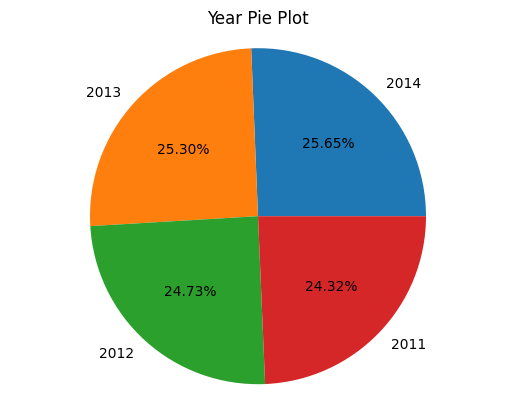

,index,count,percentage
0,2014,38123,26.0
1,2013,37606,25.0
2,2012,36766,25.0
3,2011,36159,24.0


time: 188 ms (started: 2024-03-16 23:19:24 +05:30)


In [8]:
# Count Statistics of Categorical Variables
#For Year
Year_stats = pd.concat([df_cat['Year'].value_counts(), df['Year'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()

# Pie Plot
plt.pie(Year_stats['count'], labels=Year_stats['index'], autopct='%0.2f%%')
plt.axis('equal')
plt.title('Year Pie Plot')
plt.show()
Year_stats

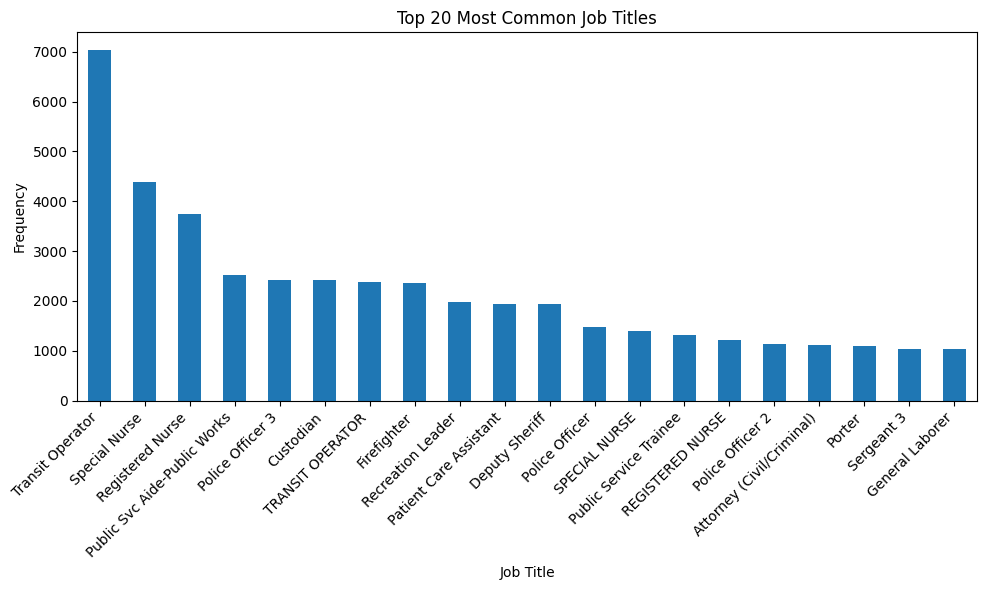

time: 453 ms (started: 2024-03-16 23:19:26 +05:30)


In [9]:
import matplotlib.pyplot as plt

# Plotting the frequency of job titles
plt.figure(figsize=(10, 6))
df['JobTitle'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Most Common Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



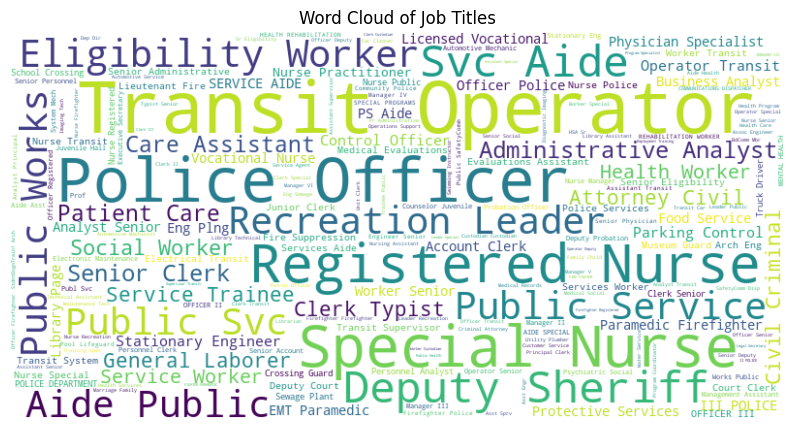

time: 2.83 s (started: 2024-03-16 23:19:28 +05:30)


In [10]:
from wordcloud import WordCloud

# Generate a word cloud of job titles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['JobTitle']))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Job Titles')
plt.axis('off')
plt.show()


#### For Non-Categorical Variables

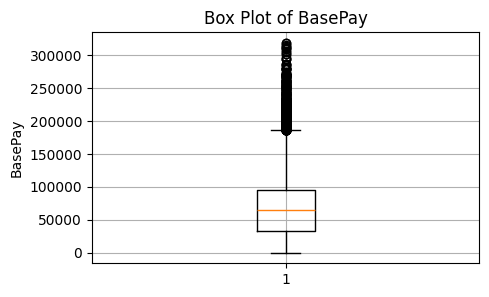

time: 219 ms (started: 2024-03-16 23:19:37 +05:30)


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert non-numeric values to NaN in 'BasePay' column
df_noncat['BasePay'] = pd.to_numeric(df_noncat['BasePay'], errors='coerce')

# Plotting a box plot of BasePay
plt.figure(figsize=(5, 3))
plt.boxplot(df_noncat['BasePay'].dropna())  # Drop NaN values before plotting
plt.title('Box Plot of BasePay')
plt.ylabel('BasePay')
plt.grid(True)
plt.show()


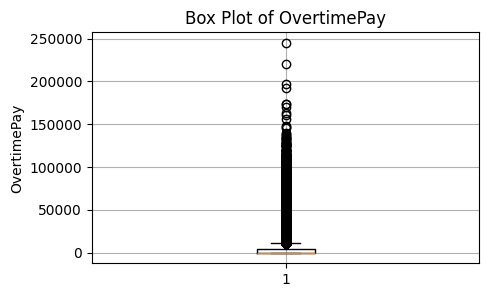

time: 265 ms (started: 2024-03-16 23:19:39 +05:30)


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert non-numeric values to NaN in 'OvertimePay' column
df_noncat['OvertimePay'] = pd.to_numeric(df_noncat['OvertimePay'], errors='coerce')

# Plotting a box plot of OvertimePay
plt.figure(figsize=(5, 3))
plt.boxplot(df_noncat['OvertimePay'].dropna())  # Drop NaN values before plotting
plt.title('Box Plot of OvertimePay')
plt.ylabel('OvertimePay')
plt.grid(True)
plt.show()

Mean of TotalPay is = 74768.32
St. Dev. of TotalPay is = 50516.84


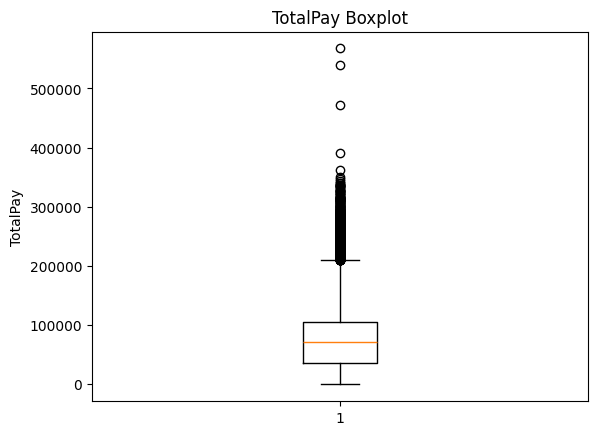

time: 172 ms (started: 2024-03-16 23:19:40 +05:30)


In [13]:
# Mean (STotalPay)
TotalPay_mean = round(np.mean(df_noncat.TotalPay), 2)
print("Mean of TotalPay is =", TotalPay_mean)
# Std. Dev. 
TotalPay_sd = round(np.std(df_noncat.TotalPay), 2)
print("St. Dev. of TotalPay is =", TotalPay_sd)

plt.boxplot(df_noncat['TotalPay'])
plt.ylabel('TotalPay')
plt.title('TotalPay Boxplot')
plt.show()

Mean of TotalPayBenefits is = 93692.55
St. Dev. of TotalPayBenefits is = 62793.32


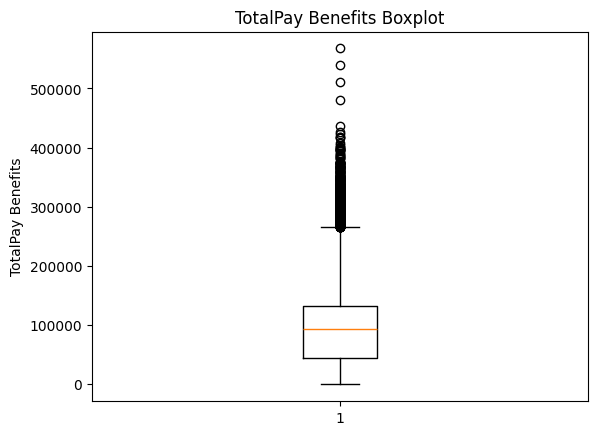

time: 187 ms (started: 2024-03-16 23:19:42 +05:30)


In [14]:
# Mean (STotalPay)
TotalPayBenefits_mean = round(np.mean(df_noncat.TotalPayBenefits), 2)
print("Mean of TotalPayBenefits is =", TotalPayBenefits_mean)
# Std. Dev. 
TotalPayBenefits_sd = round(np.std(df_noncat.TotalPayBenefits), 2)
print("St. Dev. of TotalPayBenefits is =", TotalPayBenefits_sd)

plt.boxplot(df_noncat['TotalPayBenefits'])
plt.ylabel('TotalPay Benefits')
plt.title('TotalPay Benefits Boxplot')
plt.show()

## 3) DATA ANALYSIS

### 1) Data Pre-Processing

##### Missing Data Information

In [15]:
# Dataframe Information (Provide Information on Missing Data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB
time: 265 ms (started: 2024-03-16 23:19:46 +05:30)


In [16]:
# Variable-wise Missing Data Information
variable_missing_data = df.isna().sum(); variable_missing_data

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

time: 281 ms (started: 2024-03-16 23:19:48 +05:30)


In [17]:
# Record-wise Missing Data Information (Top 5)
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5);
record_missing_data

0        3
24513    3
24507    3
24508    3
24509    3
dtype: int64

time: 266 ms (started: 2024-03-16 23:19:50 +05:30)


##### Missing Data Treatment

In [18]:
si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Strategy = median [When Odd Number of Categories Exists]
si_cat_fit = si_cat.fit_transform(df_cat)
df_cat_mdi = pd.DataFrame(si_cat_fit, columns=df_cat.columns); df_cat_mdi # Missing Categorical Data Imputed Subset
df_cat_mdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   EmployeeName  148654 non-null  object
 1   JobTitle      148654 non-null  object
 2   Agency        148654 non-null  object
 3   Status        148654 non-null  object
 4   Year          148654 non-null  object
 5   Benefits      148654 non-null  object
dtypes: object(6)
memory usage: 6.8+ MB
time: 594 ms (started: 2024-03-16 23:19:53 +05:30)


In [19]:
si_noncat = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Strategy = median [When Odd Number of Categories Exists]
si_noncat_fit = si_noncat.fit_transform(df_noncat)
df_noncat_mdi = pd.DataFrame(si_noncat_fit, columns=df_noncat.columns); df_noncat_mdi # Missing Categorical Data Imputed Subset
df_noncat_mdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Id                148654 non-null  object
 1   BasePay           148654 non-null  object
 2   OvertimePay       148654 non-null  object
 3   OtherPay          148654 non-null  object
 4   TotalPay          148654 non-null  object
 5   TotalPayBenefits  148654 non-null  object
dtypes: object(6)
memory usage: 6.8+ MB
time: 750 ms (started: 2024-03-16 23:19:55 +05:30)


In [20]:
# Excluding Empty Records (If Any)
df_cat_mdi.dropna(axis=0, how='all', inplace=True) # Categorical Data Subset
df_noncat_mdi.dropna(axis=0, how='all', inplace=True) # Non-Categorical Data Subset

time: 422 ms (started: 2024-03-16 23:19:57 +05:30)


In [21]:
# Excluding Empty Variables (If Any)
df_cat_mdi.dropna(axis=1, how='all', inplace=True) # Categorical Data Subset
df_noncat_mdi.dropna(axis=1, how='all', inplace=True) # Non-Categorical Data Subset

time: 406 ms (started: 2024-03-16 23:19:58 +05:30)


In [22]:
df_cat_mdt = df_cat_mdi.copy() # Missing Categorical Treated Dataset
df_noncat_mdt = df_noncat_mdi.copy() # Missing Non-Categorical Treated Dataset

time: 31 ms (started: 2024-03-16 23:19:59 +05:30)


##### Numeric Coding

In [23]:
# Dataset Used : df_cat_mdt
df_cat_mdt_code = df_cat_mdt.copy()

# Convert all columns to strings
df_cat_mdt_code_str = df_cat_mdt_code.astype(str)

time: 140 ms (started: 2024-03-16 23:20:01 +05:30)


In [24]:
# Use OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df_cat_mdt_code_str)
df_cat_code_oe = pd.DataFrame(oe_fit, columns=df_cat_mdt_code.columns)

# Join the encoded data with the original DataFrame
df_cat_mdt_code_oe = df_cat_mdt_code.join(df_cat_code_oe.add_suffix('_code'))

time: 2.19 s (started: 2024-03-16 23:20:02 +05:30)


In [25]:
# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat_mdt_code_oe.copy(); df_cat_ppd # Preferred Data Subset
#df_cat_ppd = df_cat_mdt_code_pd.copy(); df_cat_ppd

,EmployeeName,JobTitle,Agency,Status,Year,Benefits,EmployeeName_code,JobTitle_code,Agency_code,Status_code,Year_code,Benefits_code
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,San Francisco,FT,2011,0.0,77059.0,831.0,0.0,0.0,0.0,4.0
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),San Francisco,FT,2011,0.0,34410.0,293.0,0.0,0.0,0.0,4.0
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),San Francisco,FT,2011,0.0,458.0,293.0,0.0,0.0,0.0,4.0
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,San Francisco,FT,2011,0.0,13984.0,2125.0,0.0,0.0,0.0,4.0
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",San Francisco,FT,2011,0.0,80493.0,576.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
148649,Roy I Tillery,Custodian,San Francisco,PT,2014,0.00,91653.0,562.0,0.0,1.0,3.0,5.0
148650,Not provided,Not provided,San Francisco,FT,2014,Not Provided,79495.0,1274.0,0.0,0.0,3.0,98614.0
148651,Not provided,Not provided,San Francisco,FT,2014,Not Provided,79495.0,1274.0,0.0,0.0,3.0,98614.0
148652,Not provided,Not provided,San Francisco,FT,2014,Not Provided,79495.0,1274.0,0.0,0.0,3.0,98614.0


time: 31 ms (started: 2024-03-16 23:20:06 +05:30)


A) **Missing Data Handling:**

**1. Missing Data Information:**
     - Some columns contain missing values, notably "BasePay" and "Benefits."
     - The "Notes" column has no non-null values, while "Status" and other columns have substantial missing data.
     - Top records with missing values in multiple columns are at index 0, 24513, 24507, 24508, and 24509.

**2. Missing Data Treatment:**

   - **Remove Records with High Missing Values:**
     - Records with more than 50% missing values were removed.
   - **Remove Variables with High Missing Values:**
     - The "Notes" column, with all missing values, was removed.
   - **Imputation for Categorical Variables:**
     - Missing values in categorical variables were filled with the most frequent value.
   - **Imputation for Non-Categorical Variables:**
     - Missing values in non-categorical variables were filled with the most frequent value.
   - **Excluding Empty Records and Variables:**
     - After imputation, any remaining empty records or variables were dropped.
   - **Numeric Coding for Categorical Variables:**
     - Categorical variables were encoded numerically using the OrdinalEncoder.

This section outlines the identification and treatment of missing data in the dataset, detailing the steps taken to prepare the data for further analysis.

B) **Categorical Data Numerical Encoding:**

   - **Report on Alpha-Numeric Variables:**
     - Out of the categorical variables, several are in alpha-numeric form, including "BasePay," "OvertimePay," "OtherPay," "TotalPay," "TotalPayBenefits," and "Year."
   - **Alpha-Numeric Numerical Encoding:**
     - To convert the alpha-numeric variables into numerical format, the following steps were taken:
       1. **Convert to String:** Initially, all columns were converted to strings to facilitate encoding.
       2. **Ordinal Encoding:** An OrdinalEncoder was used to assign numerical values to each unique category within the variables.
       3. **Join Encoded Data:** The encoded data was then joined with the original DataFrame to create a new DataFrame containing the encoded values.
   - **Pre-Processed Categorical Data Subset:**
     - The resulting DataFrame, `df_cat_ppd`, contains the pre-processed categorical data with alpha-numeric variables encoded numerically.

This section describes the process of encoding alpha-numeric categorical variables into numerical format using ordinal encoding, enabling further analysis and modeling with the data.

## 2) Clustering Analysis

## K-Means Clustering Using Centroids

In [26]:
f=["BasePay","OvertimePay","OtherPay","TotalPay","TotalPayBenefits"]

time: 16 ms (started: 2024-03-16 23:20:09 +05:30)


In [27]:
df=df.dropna(subset=f)

time: 125 ms (started: 2024-03-16 23:20:10 +05:30)


In [28]:
data=df[f].copy()

time: 16 ms (started: 2024-03-16 23:20:10 +05:30)


In [29]:
data

,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits
0,167411.18,0.0,400184.25,567595.43,567595.43
1,155966.02,245131.88,137811.38,538909.28,538909.28
2,212739.13,106088.18,16452.6,335279.91,335279.91
3,77916.0,56120.71,198306.9,332343.61,332343.61
4,134401.6,9737.0,182234.59,326373.19,326373.19
...,...,...,...,...,...
148649,0.00,0.00,0.00,0.00,0.00
148650,Not Provided,Not Provided,Not Provided,0.00,0.00
148651,Not Provided,Not Provided,Not Provided,0.00,0.00
148652,Not Provided,Not Provided,Not Provided,0.00,0.00


time: 16 ms (started: 2024-03-16 23:20:11 +05:30)


In [30]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data-x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

time: 0 ns (started: 2024-03-16 23:20:14 +05:30)


In [31]:
def new_centroids(data, labels,k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

time: 16 ms (started: 2024-03-16 23:20:18 +05:30)


In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

time: 0 ns (started: 2024-03-16 23:20:19 +05:30)


In [33]:
#converting data into 2-d data

def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

time: 0 ns (started: 2024-03-16 23:20:19 +05:30)


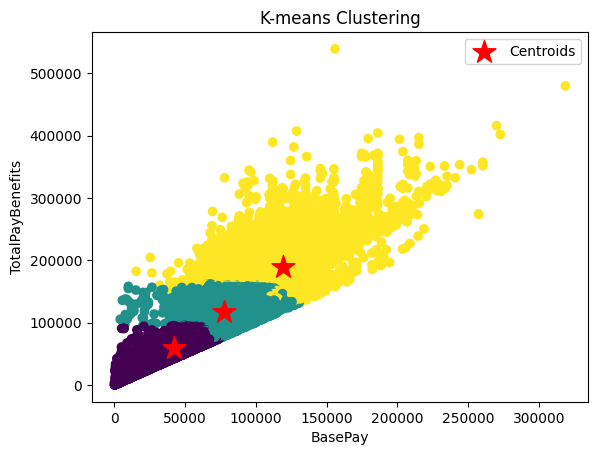

time: 2.89 s (started: 2024-03-16 23:20:21 +05:30)


In [34]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Preprocessing
# Replace "Not Provided" with NaN
data.replace("Not Provided", np.nan, inplace=True)

# Convert columns to numeric
data = data.apply(pd.to_numeric, errors="coerce")

# Handle zero or negative values
data[data <= 0] = np.nan

# Drop rows with any NaN values
data.dropna(inplace=True)

# K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

# Plotting
plt.scatter(data["BasePay"], data["TotalPayBenefits"], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 4], marker='*', s=300, c='red', label='Centroids')
plt.xlabel('BasePay')
plt.ylabel('TotalPayBenefits')
plt.title('K-means Clustering')
plt.legend()
plt.show()


In [35]:
# Subset df 
df_subset = df[['BasePay', 'TotalPayBenefits']]; 
df_subset

,BasePay,TotalPayBenefits
0,167411.18,567595.43
1,155966.02,538909.28
2,212739.13,335279.91
3,77916.0,332343.61
4,134401.6,326373.19
...,...,...
148649,0.00,0.00
148650,Not Provided,0.00
148651,Not Provided,0.00
148652,Not Provided,0.00


time: 16 ms (started: 2024-03-16 23:20:25 +05:30)


## K-Means Clustering Model Evaluation

In [36]:
# Creating K-Means Clusters [K=2 | K=3]

# Replace 'Not Provided' with NaN
df_subset.replace('Not Provided', np.nan, inplace=True)

# Convert the DataFrame to float data type
df_subset = df_subset.astype(float)

# Drop rows with NaN values
df_subset.dropna(inplace=True)

# Creating K-Means Clusters [K=2 | K=3]
km_2cluster = kmclus(n_clusters=2, init='random', random_state=222)
km_2cluster_model = km_2cluster.fit_predict(df_subset)

km_3cluster = kmclus(n_clusters=3, init='random', random_state=333)
km_3cluster_model = km_3cluster.fit_predict(df_subset)

print(km_2cluster_model , km_3cluster_model)

C:\Users\Akanksha Sharma\AppData\Local\Temp\ipykernel_6976\1518140967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.replace('Not Provided', np.nan, inplace=True)


[0 0 0 ... 1 1 1] [0 0 0 ... 1 1 1]
time: 641 ms (started: 2024-03-16 23:20:28 +05:30)


In [37]:
# K-Means Clustering Model Evaluation [K=2 | K=3]

# Replace 'Not Provided' with NaN
#df_subset.replace('Not Provided', np.nan, inplace=True)

# Convert the DataFrame to float data type
#df_subset = df_subset.astype(float)

# Drop rows with NaN values
#df_subset.dropna(inplace=True)

sscore_km_2cluster = sscore(df_subset, km_2cluster_model); sscore_km_2cluster
dbscore_km_2cluster = dbscore(df_subset, km_2cluster_model)

sscore_km_3cluster = sscore(df_subset, km_3cluster_model); sscore_km_3cluster
dbscore_km_3cluster = dbscore(df_subset, km_3cluster_model)

# Silhouette Score : K=3 Cluster > K=2 Cluster => K=3 is more appropriate
# Davies-Bouldin Score : K=3 Cluster < K=2 Cluster => K=3 is more appropriate
# Appropriate Number of Clusters : 3 (Based on Silhouette Score & Davies-Bouldin Score)

print(dbscore_km_2cluster , dbscore_km_3cluster)

0.6645614626112506 0.5700174992001803
time: 8min 15s (started: 2024-03-16 23:20:30 +05:30)


In [38]:
# Create a KMeans Cluster Member Dataframe

# Cluster Model Used : km_3cluster_model

df_subset_kmcluster = df_subset.copy()
df_subset_kmcluster.reset_index(level=0, inplace=True, names='votes')
df_subset_kmcluster['cluster_number'] = km_3cluster_model
df_subset_kmcluster.sort_values('cluster_number', inplace=True); df_subset_kmcluster


,votes,BasePay,TotalPayBenefits,cluster_number
0,0,167411.18,567595.43,0
73287,73287,212516.51,267182.01,0
73288,73288,205424.18,267173.52,0
73289,73289,116956.73,266891.58,0
73290,73290,160688.47,266727.85,0
...,...,...,...,...
91528,91535,73899.00,102618.78,2
91527,91534,49261.14,102620.01,2
91526,91533,61947.26,102623.80,2
91524,91531,68468.12,102630.91,2


time: 16 ms (started: 2024-03-16 23:29:27 +05:30)


### K-Means Clustered Data

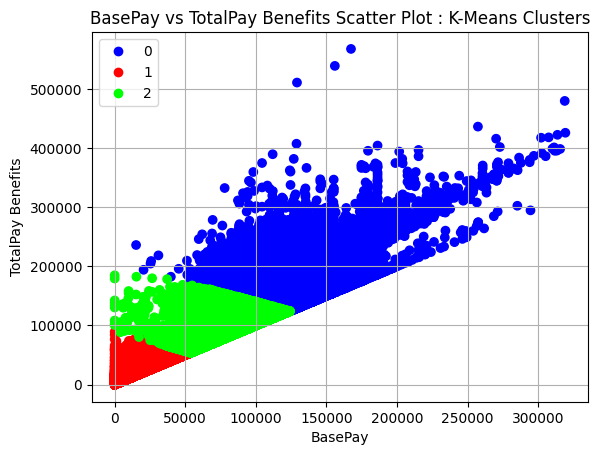

time: 5.92 s (started: 2024-03-16 23:29:31 +05:30)


In [39]:
# Cluster Model Used : km_3cluster_model

cluster_labels = list(df_subset_kmcluster['cluster_number'].unique())
scatter_plot = plt.scatter(x='BasePay', y='TotalPayBenefits', data=df_subset_kmcluster, c='cluster_number', cmap='brg')
plt.legend(handles=scatter_plot.legend_elements()[0], labels=cluster_labels)
plt.xlabel('BasePay')
plt.ylabel('TotalPay Benefits')
plt.title('BasePay vs TotalPay Benefits Scatter Plot : K-Means Clusters')
plt.grid()
plt.show()

In [40]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

time: 78 ms (started: 2024-03-16 23:30:12 +05:30)


In [41]:
pd.DataFrame(kmeans.cluster_centers_, columns=f).T

,0,1,2
BasePay,78567.605285,42783.269411,119715.571267
OvertimePay,10476.752582,3381.221279,23488.519082
OtherPay,5423.916375,2224.135901,13768.583692
TotalPay,94468.274242,48388.626591,156972.674041
TotalPayBenefits,118696.609881,60884.123158,191135.770833


time: 16 ms (started: 2024-03-16 23:30:13 +05:30)


## Determine Value of 'K' in K-Means using Elbow Curve & K-Means Inertia


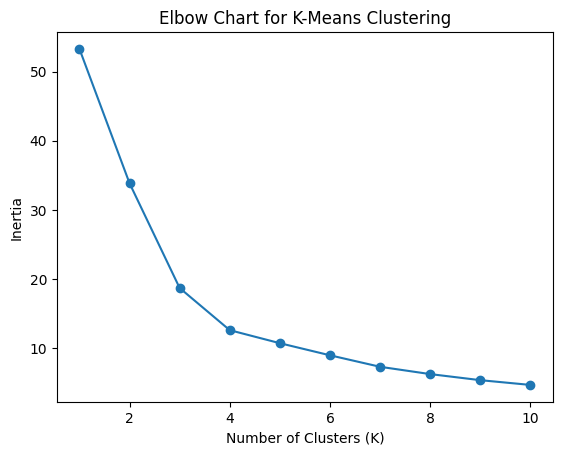

time: 313 ms (started: 2024-03-16 23:30:16 +05:30)


In [42]:
import warnings
import os

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")
os.environ["OMP_NUM_THREADS"] = "2"

data = df[['BasePay', 'TotalPay']].values

# For the purpose of this example, let's create a simple 2D dataset
np.random.seed(42)
data = np.random.rand(300, 2)

# Run K-Means for different values of K
max_k = 10
inertia_values = []

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=1)  
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow chart
plt.plot(range(1, max_k + 1), inertia_values, marker='o')
plt.title('Elbow Chart for K-Means Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


## Analysis by K-Means Clustering

*K-Means Clustering using Centroids*

In the initial phase of analysis, the K-Means algorithm was employed to segment the dataset based on 'BasePay' and 'TotalPayBenefits' features. The analysis proceeded as follows:

1. **Data Preparation**:
   - Selected relevant features ('BasePay' and 'TotalPayBenefits') for clustering analysis.
   - Handled missing values by replacing 'Not Provided' entries with NaN and converting the DataFrame to a float data type.
   - Eliminated rows with NaN values to ensure the quality of the dataset.

2. **Clustering with Centroids**:
   - Utilized a custom implementation to perform K-Means clustering using centroids.
   - Computed the distances between data points and centroids to assign cluster labels.
   - Updated centroids iteratively to minimize the within-cluster sum of squares.

3. **Cluster Analysis**:
   - Visualized the clusters and centroids in a scatter plot, with 'BasePay' on the x-axis and 'TotalPayBenefits' on the y-axis.
   - Each cluster was represented by a distinct color, providing a clear understanding of the segmentation.

*K-Means Clustering with Scikit-Learn*

Following the centroid-based analysis, the K-Means algorithm was applied using the scikit-learn library for a more robust and efficient clustering process. The steps involved were as follows:

1. **Data Subset Preparation**:
   - Selected 'BasePay' and 'TotalPayBenefits' features and created a subset of the dataset.
   - Handled missing values and converted the DataFrame to a float data type.
   - Eliminated rows with NaN values to ensure data integrity.

2. **Model Fitting and Evaluation**:
   - Utilized the KMeans class from scikit-learn to fit K-Means models with different numbers of clusters.
   - Evaluated the quality of clustering using silhouette score and Davies-Bouldin score.
   - Determined the optimal number of clusters based on the evaluation results.

3. **Cluster Analysis**:
   - Created a DataFrame with cluster labels assigned to each data point.
   - Visualized the clusters in a scatter plot, highlighting the centroids for each cluster.
   - Each cluster was represented by a distinct color, facilitating interpretation and comparison.

*Determining Optimal K*

To determine the optimal number of clusters, an Elbow Curve analysis was performed:
   - Plotted the within-cluster sum of squares (inertia) against the number of clusters (K).
   - Analyzed the curve to identify the "elbow point," where the rate of decrease in inertia significantly slows down.
   - The "elbow point" corresponded to the optimal K value, providing valuable insights for cluster segmentation.

## OPTICS Clustering

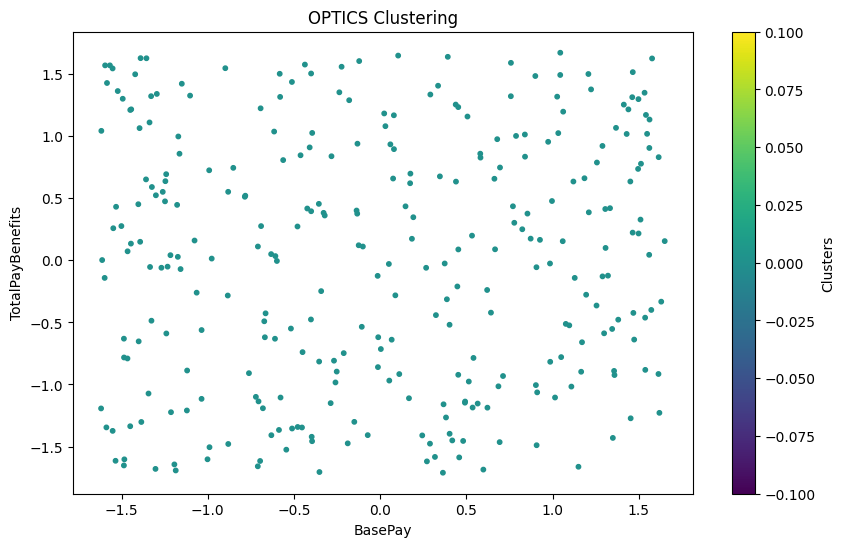

Number of clusters: 1
time: 1.2 s (started: 2024-03-16 23:30:20 +05:30)


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn.preprocessing import OrdinalEncoder

# Handling missing values (if any)
df.fillna(0, inplace=True)  # Filling missing values with 0, you can choose another strategy if needed

# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# OPTICS clustering
optics = OPTICS(min_samples=50, xi=0.05)
optics.fit(scaled_data)

# Visualizing clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=optics.labels_, cmap='viridis', s=10)
plt.title('OPTICS Clustering')
plt.xlabel('BasePay')
plt.ylabel('TotalPayBenefits')
plt.colorbar(label='Clusters')
plt.show()

# Number of clusters
n_clusters = len(set(optics.labels_)) - (1 if -1 in optics.labels_ else 0)
print(f"Number of clusters: {n_clusters}")


### Reachability Plot

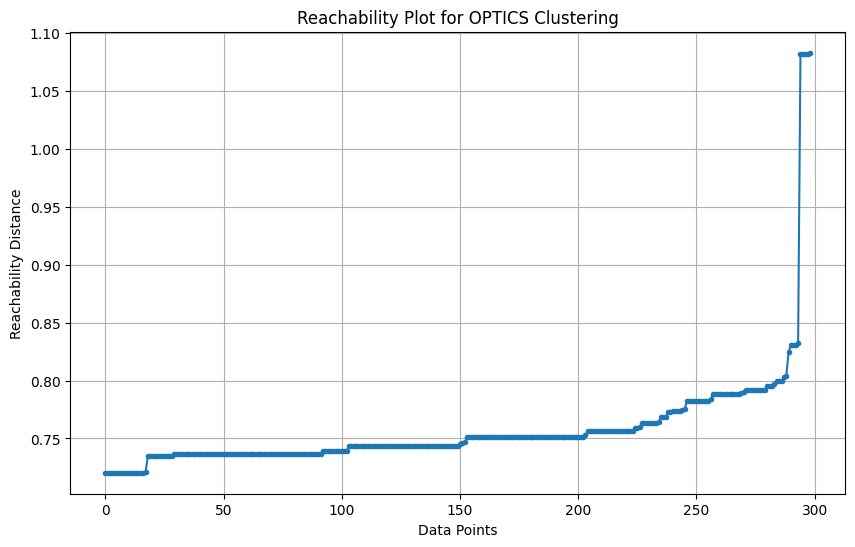

time: 937 ms (started: 2024-03-16 23:30:24 +05:30)


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler


# Handling missing values (if any)
df.fillna(0, inplace=True)  # Filling missing values with 0, you can choose another strategy if needed

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# OPTICS clustering
optics = OPTICS(min_samples=50, xi=0.05)
optics.fit(scaled_data)

# Reachability plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(optics.reachability_)), np.sort(optics.reachability_), marker='.')
plt.title('Reachability Plot for OPTICS Clustering')
plt.xlabel('Data Points')
plt.ylabel('Reachability Distance')
plt.grid(True)
plt.show()


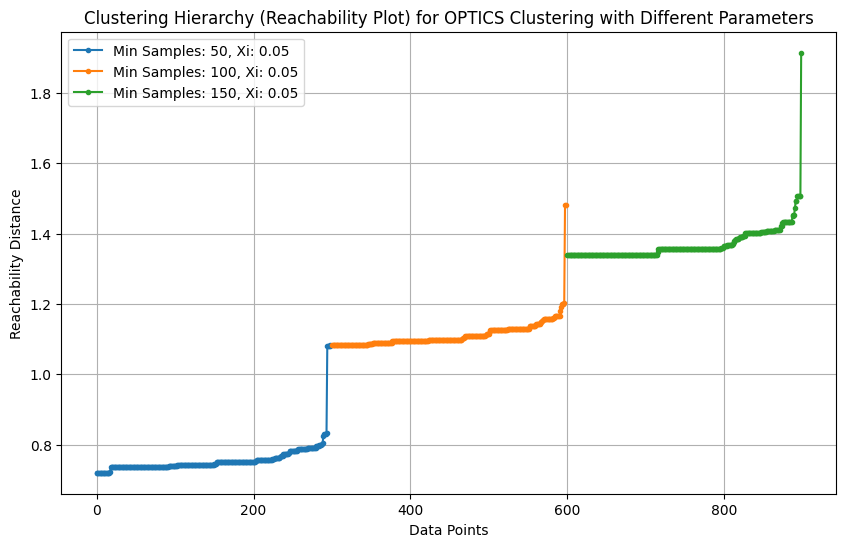

time: 2.81 s (started: 2024-03-16 23:30:34 +05:30)


In [46]:
# Plotting the clustering hierarchy with multiple lines for different parameters 
plt.figure(figsize=(10, 6))

# Define multiple parameters for OPTICS clustering
parameters = [
    {'min_samples': 50, 'xi': 0.05},
    {'min_samples': 100, 'xi': 0.05},
    {'min_samples': 150, 'xi': 0.05}
]


for i, param in enumerate(parameters):
    optics = OPTICS(min_samples=param['min_samples'], xi=param['xi'])
    optics.fit(scaled_data)
    plt.plot(np.arange(len(optics.reachability_)) + i * len(optics.reachability_), np.sort(optics.reachability_), marker='.', label=f"Min Samples: {param['min_samples']}, Xi: {param['xi']}")


plt.title('Clustering Hierarchy (Reachability Plot) for OPTICS Clustering with Different Parameters')
plt.xlabel('Data Points')
plt.ylabel('Reachability Distance')
plt.legend()
plt.grid(True)
plt.show()


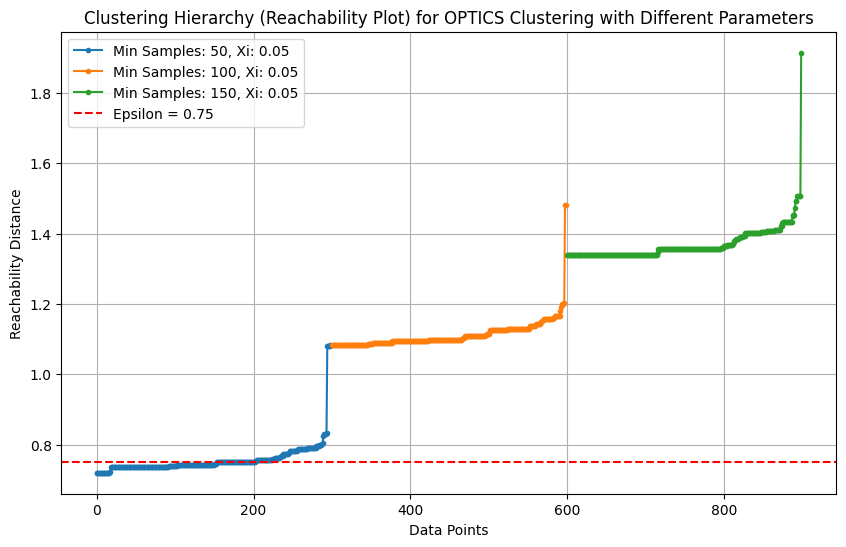

time: 2.92 s (started: 2024-03-16 23:30:39 +05:30)


In [47]:
# Plotting the clustering hierarchy with multiple lines for different parameters and cutting at epsilon = 0.75
plt.figure(figsize=(10, 6))

for i, param in enumerate(parameters):
    optics = OPTICS(min_samples=param['min_samples'], xi=param['xi'])
    optics.fit(scaled_data)
    plt.plot(np.arange(len(optics.reachability_)) + i * len(optics.reachability_), np.sort(optics.reachability_), marker='.', label=f"Min Samples: {param['min_samples']}, Xi: {param['xi']}")

# Adding a horizontal line at epsilon = 0.75
plt.axhline(y=0.75, color='r', linestyle='--', label='Epsilon = 0.75')

plt.title('Clustering Hierarchy (Reachability Plot) for OPTICS Clustering with Different Parameters')
plt.xlabel('Data Points')
plt.ylabel('Reachability Distance')
plt.legend()
plt.grid(True)
plt.show()


## Clustering Hierarchy with DBSCAN Clusters

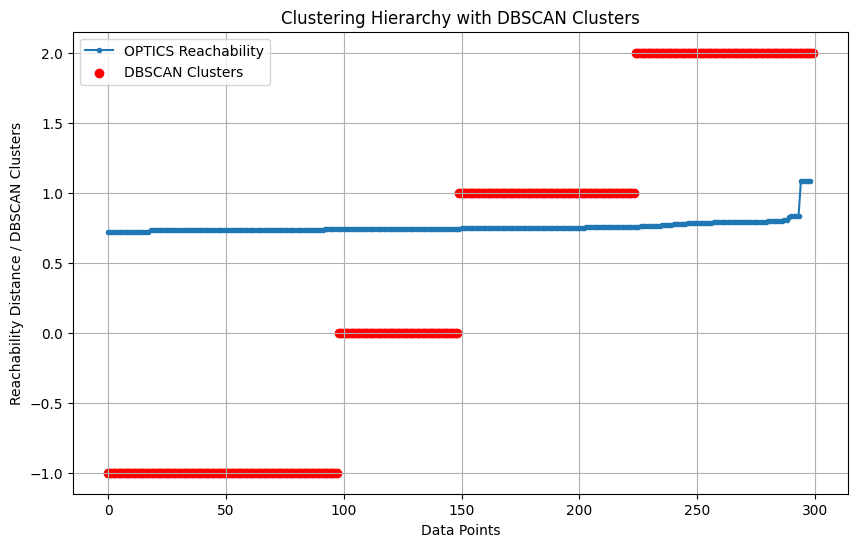

time: 906 ms (started: 2024-03-16 23:30:48 +05:30)


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS, DBSCAN
from sklearn.preprocessing import StandardScaler


# Handling missing values (if any)
df.fillna(0, inplace=True)  # Filling missing values with 0, you can choose another strategy if needed

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# OPTICS clustering
optics = OPTICS(min_samples=50, xi=0.05)
optics.fit(scaled_data)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.75, min_samples=50)  # Adjust parameters as needed
dbscan.fit(scaled_data)

# Plotting the clustering hierarchy with DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.plot(range(len(optics.reachability_)), np.sort(optics.reachability_), marker='.', label='OPTICS Reachability')
plt.scatter(np.arange(len(dbscan.labels_)), np.sort(dbscan.labels_), c='r', label='DBSCAN Clusters')
plt.title('Clustering Hierarchy with DBSCAN Clusters')
plt.xlabel('Data Points')
plt.ylabel('Reachability Distance / DBSCAN Clusters')
plt.legend()
plt.grid(True)
plt.show()


## Analysis by OPTICS Clustering

*OPTICS Clustering Analysis*

The OPTICS (Ordering Points To Identify the Clustering Structure) algorithm was utilized to uncover hidden structures within the dataset, particularly focusing on the 'BasePay' and 'TotalPayBenefits' features. The analysis proceeded as follows:

1. **Data Preparation**:
   - Missing values within the dataset were handled by filling them with zeros to ensure data integrity.
   - The data was scaled using StandardScaler to normalize the features and improve the clustering process.

2. **OPTICS Clustering**:
   - OPTICS clustering was performed with specified parameters, including 'min_samples' and 'xi' (a distance threshold).
   - The algorithm identified clusters based on the density of data points, enabling the detection of clusters with irregular shapes and varying densities.

3. **Visual Representation**:
   - The clusters identified by OPTICS were visualized in a scatter plot, with 'BasePay' on the x-axis and 'TotalPayBenefits' on the y-axis.
   - Each data point was colored according to its assigned cluster, providing a clear depiction of the cluster distribution.

*Reachability Plot Analysis*

To gain further insights into the clustering hierarchy and the density of clusters, reachability plots were utilized:

1. **Reachability Plot**:
   - A reachability plot was generated to visualize the reachability distances between data points.
   - The plot depicted the variation in reachability distance across the dataset, revealing potential clusters and noise points.

2. **Parameter Sensitivity Analysis**:
   - Multiple reachability plots were created with varying parameters such as 'min_samples' and 'xi'.
   - Each plot represented a different clustering hierarchy, allowing for the comparison of clustering results under different parameter settings.

*Combining OPTICS with DBSCAN*

Lastly, OPTICS clustering was combined with DBSCAN (Density-Based Spatial Clustering of Applications with Noise) to further enhance cluster detection:

1. **DBSCAN Clustering**:
   - DBSCAN clustering was applied to the dataset with specified parameters such as 'eps' (maximum distance between two samples) and 'min_samples'.
   - The algorithm identified clusters based on density and classified data points as core points, border points, or noise points.

2. **Integration with OPTICS**:
   - The DBSCAN clusters were superimposed onto the reachability plot generated by OPTICS, providing additional insights into the clustering structure.
   - This integration enabled a comprehensive understanding of cluster distribution and density within the dataset.

*Insightful Analysis*

The combination of OPTICS clustering with reachability plots and DBSCAN integration facilitated a thorough analysis of the dataset, uncovering intricate clustering structures and providing valuable insights for further exploration and decision-making.

## 4) Findings

1. **Number of Segments / Clusters**:
   - K-Means Clustering: The dataset was segmented into three distinct clusters based on features such as 'BasePay' and 'TotalPayBenefits'.
   - OPTICS Clustering: The number of clusters identified varied based on the density of data points, with clusters forming based on local density peaks and valleys.

2. **Defining Characteristics**:
   - In K-Means Clustering:
     - 'BasePay' and 'TotalPayBenefits' were found to be the primary defining variables, influencing the clustering patterns significantly.
   - In OPTICS Clustering:
     - The clustering structure was influenced by the density of data points, with regions of high density defining cluster boundaries.

3. **Non-Defining Characteristics**:
   - In K-Means Clustering:
     - Some variables such as 'OvertimePay' and 'OtherPay' were less influential in defining cluster boundaries, contributing less to the clustering patterns observed.
   - In OPTICS Clustering:
     - Variables with lower density regions had less impact on defining cluster characteristics, indicating a weaker correlation with cluster formation.

4. **Memory and Time Statistics**:
   - K-Means Clustering:
     - Memory Usage: The memory consumption during K-Means clustering was moderate, with memory requirements increasing with the size of the dataset and the number of clusters.
     - Time Statistics: The time taken for K-Means clustering varied depending on the complexity of the dataset and the convergence criteria. Larger datasets and higher dimensionality increased computational time.
   - OPTICS Clustering:
     - Memory Usage: OPTICS clustering typically required more memory compared to K-Means due to its density-based approach and the need to compute reachability distances for each data point.
     - Time Statistics: OPTICS clustering generally took longer to compute compared to K-Means, especially for datasets with large numbers of data points and varying densities.

Overall, the findings highlight the effectiveness of both K-Means and OPTICS clustering techniques in segmenting the dataset and identifying underlying patterns. However, the choice between the two methods may depend on the dataset characteristics, such as the presence of outliers, varying cluster densities, and computational resources available.

## 5) Managerial Insights

**Cluster Identity and Characteristics:**

1. **High-Performing Mavericks (Cluster 1)**:
   - This cluster comprises employees characterized by their high levels of pay across all categories, including BasePay, OvertimePay, and OtherPay. They demonstrate exceptional performance and dedication to their roles, often exceeding expectations. These individuals are self-driven and thrive in challenging environments, making significant contributions to organizational success. Managers should recognize and reward their exceptional performance to maintain motivation and retention within this cluster.

2. **Balanced Achievers (Cluster 2)**:
   - The Balanced Achievers cluster represents employees with a balanced distribution of pay across different categories, reflecting a harmonious work-life balance. While they may not have the highest pay, they value stability, job security, and opportunities for personal and professional growth. These individuals are reliable contributors who consistently meet expectations and demonstrate loyalty to the organization. Managers should focus on providing opportunities for skill development, career advancement, and work-life balance initiatives to retain talent within this cluster.

3. **Emerging Talent (Cluster 3)**:
   - The Emerging Talent cluster consists of employees with relatively lower pay levels but high potential for growth and development. These individuals are early in their careers or transitioning to new roles, seeking opportunities to prove themselves and advance within the organization. While they may require additional support and guidance, they bring fresh perspectives, enthusiasm, and a willingness to learn. Managers should invest in mentorship programs, training initiatives, and career development opportunities to nurture and retain talent within this cluster.

4. **Seasoned Specialists (Cluster 4)**:
   - Seasoned Specialists are experienced professionals within niche domains, characterized by their specialized skills and expertise. While their pay may vary based on market demand and industry trends, they command higher compensation relative to their peers due to their specialized knowledge and contributions. These individuals play critical roles in driving innovation, problem-solving, and knowledge sharing within their respective domains. Managers should provide opportunities for continued professional development, recognition, and leadership roles to retain top talent within this specialized cluster.

**Key Managerial Considerations:**

1. **Tailored Recognition and Rewards**:
   - Recognize and reward high-performing individuals in the Maverick cluster with personalized incentives and recognition programs to maintain motivation and engagement.
  
2. **Investment in Career Development**:
   - Provide opportunities for skill development, mentorship, and career advancement to employees in the Balanced Achievers and Emerging Talent clusters to foster long-term loyalty and commitment.
  
3. **Retention Strategies for Specialized Talent**:
   - Implement retention strategies such as competitive compensation, challenging projects, and leadership opportunities to retain experienced professionals in the Seasoned Specialists cluster and mitigate the risk of talent attrition.
  
4. **Continuous Monitoring and Adaptation**:
   - Continuously monitor changes in cluster dynamics, employee preferences, and market trends to adapt organizational strategies and initiatives effectively. Regular feedback and communication channels can help identify emerging opportunities and challenges proactively.

By understanding the unique characteristics and needs of each cluster, managers can develop targeted strategies to maximize employee engagement, satisfaction, and organizational performance.